# Rotating 3d song-space

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns; sns.set();
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

from matplotlib.colors import ListedColormap

In [2]:
song_space = pd.read_csv('song_space.csv',index_col = 0)
song_space.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,P,Pn,NT
0,1.428137,-0.699998,-1.298178,-0.747556,-0.247292,0.073388,-0.345115,-0.006151,-0.798485,G,2,19.0
1,1.019025,0.089338,-1.689248,-1.000667,-0.095347,0.171218,-0.274625,0.070705,-0.496229,G,2,19.0
2,1.929636,-0.313293,-1.086506,-0.481109,-0.191670,0.454846,-0.348093,0.242061,-0.141555,G,2,19.0
3,2.114189,-1.081862,-1.029404,0.200249,-0.355422,0.320455,-0.230030,0.429372,0.172292,G,2,19.0
4,-0.210426,-1.033666,0.245073,-1.201667,-0.309091,0.321297,-1.587318,0.205994,-0.228719,G,2,19.0


In [3]:
#defining an appropriate color map for future use
prinia_cmap = ListedColormap(sns.color_palette("Set1",4).as_hex())

In [4]:
def get_camera_position(ax):
    """returns the camera position for 3D axes in cartesian coordinates"""
    r = np.square(ax.xy_viewLim.max).sum()
    theta, phi = np.radians((90 - ax.elev, ax.azim))
    return np.array(sph2cart(r, theta, phi), ndmin=2).T

def sph2cart(r, theta, phi):
    """spherical to cartesian transformation."""
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

def reorder_camera_distance():
    """
    Sort the patches (via their offsets) by decreasing distance from camera position
    so that the furthest gets drawn first.
    """
    # camera position in xyz
    camera = get_camera_position(ax)
    # distance of patches from camera
    d = np.square(np.subtract(camera, patches._offsets3d)).sum(0)
    o = d.argsort()[::-1]

    patches._offsets3d = tuple(np.array(patches._offsets3d)[:, o])
    patches._facecolor3d = patches._facecolor3d[o]
    patches._edgecolor3d = patches._edgecolor3d[o]
    # todo: similar for linestyles, linewidths, etc.... 

def on_draw(event):
    reorder_camera_distance()

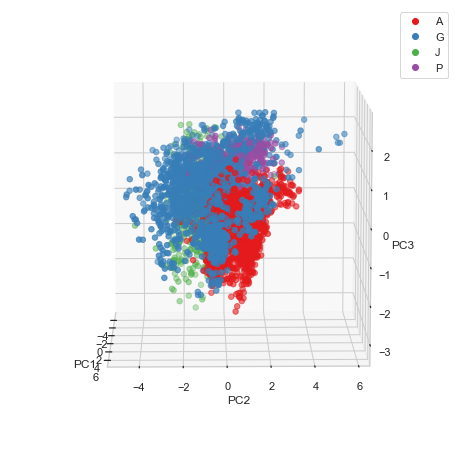

In [5]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(8,8))
classes = ['A','G','J','P']
ax = fig.add_subplot(111, projection='3d')


patches = ax.scatter(song_space['PC1'], song_space['PC2'], -song_space['PC3'],\
                         c = song_space['Pn'], cmap = prinia_cmap, s=30)
plt.legend(handles=patches.legend_elements()[0], labels=classes)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

fig.canvas.mpl_connect('draw_event', on_draw)

ax.view_init(10, 100)  

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, 
                               frames=360, interval=20, blit=True)
# Save
anim.save('song_space_3d.mp4', fps=30, extra_args=['-vcodec', 'libx264'], dpi=300)